In [12]:
from tqdm import TqdmWarning
import warnings
warnings.filterwarnings("ignore", category=TqdmWarning)
from tqdm.auto import tqdm  # will not emit the IProgress warning now

In [13]:
from utils import base_configs, deps, tr_va_te_split
from utils.helpers import rw_csv_helpers

In [14]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
CONFIGS = base_configs.get_base_configs()
# path to your global SHAP file

#SWITCH THE FOLLOWING ACCORDINGLY
CONFIGS["RUN_TS"] = "20251118_101434"

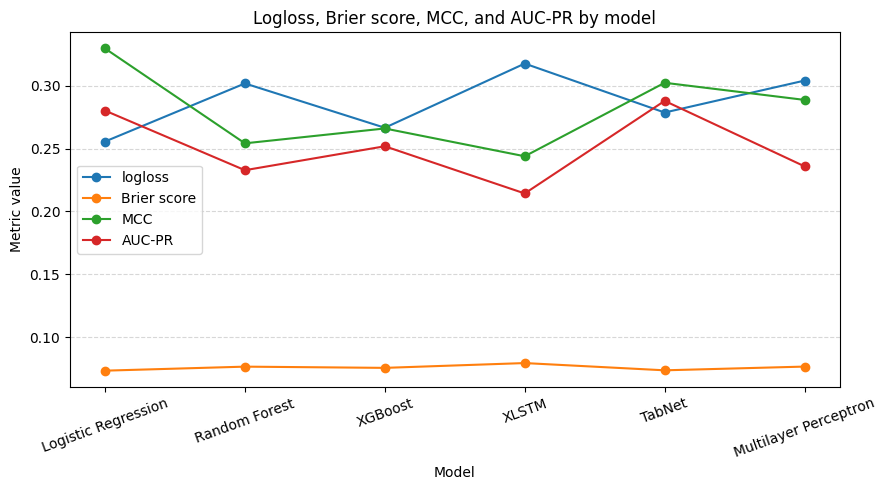

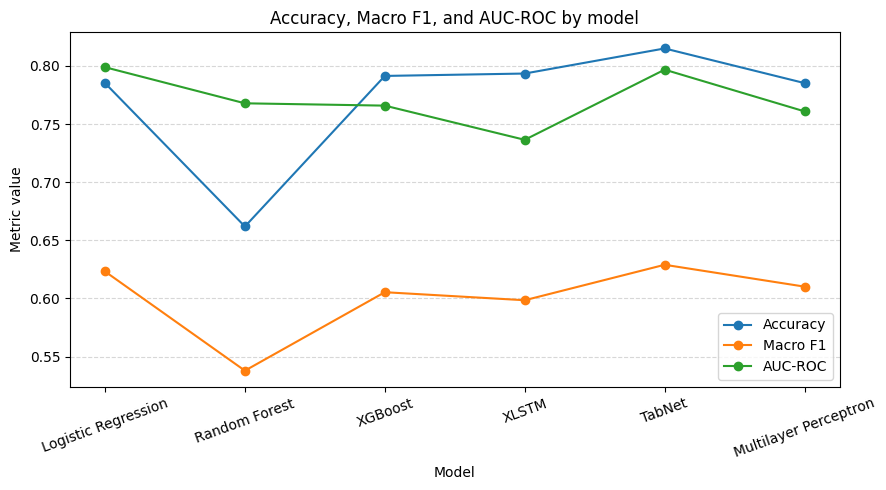

Saved figures to:
   op/logloss_brier_mcc_aucpr_by_model.jpg
   op/acc_f1_aucroc_by_model.jpg


In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Read the global shap file
# ------------------------------------------------------------------
# CHANGE THIS PATH to your actual file location
path = f"op/all_test_report.csv"

# Directory where CSV lives (for saving figures there)
out_dir = os.path.dirname(path)
if out_dir == "":
    out_dir = "."

# Mapping from short code to full model name
model_name_map = {
    "lr":    "Logistic Regression",
    "rf":    "Random Forest",
    "xgb":   "XGBoost",
    "xlstm": "XLSTM",
    "tabnet":"TabNet",
    "mlp":   "Multilayer Perceptron",
}

# Optional: enforce a specific order
desired_order = ["lr", "rf", "xgb", "xlstm", "tabnet", "mlp"]

# Reindex in desired order, then add full names
df = df.set_index("model").reindex(desired_order).reset_index()
df["model_full"] = df["model"].map(model_name_map)

models_full = df["model_full"]

# --------------------------------------------------------
# 2. Figure 1: logloss, Brier score, MCC, AUC-PR
# --------------------------------------------------------
plt.figure(figsize=(9, 5))

plt.plot(models_full, df["logloss"], marker="o", label="logloss")
plt.plot(models_full, df["brier"],   marker="o", label="Brier score")
plt.plot(models_full, df["mcc"],     marker="o", label="MCC")
plt.plot(models_full, df["auc_pr"],  marker="o", label="AUC-PR")

plt.xlabel("Model")
plt.ylabel("Metric value")
plt.title("Logloss, Brier score, MCC, and AUC-PR by model")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=20)
plt.legend()
plt.tight_layout()

# Save as .jpg in same directory as CSV
fig1_path = os.path.join(out_dir, "logloss_brier_mcc_aucpr_by_model.jpg")
plt.savefig(fig1_path, dpi=300, format="jpg")

plt.show()

# --------------------------------------------------------
# 3. Figure 2: Accuracy, Macro F1, AUC-ROC
# --------------------------------------------------------
plt.figure(figsize=(9, 5))

plt.plot(models_full, df["acc"],          marker="o", label="Accuracy")
plt.plot(models_full, df["macro_avg_f1"], marker="o", label="Macro F1")
plt.plot(models_full, df["auc_roc"],      marker="o", label="AUC-ROC")

plt.xlabel("Model")
plt.ylabel("Metric value")
plt.title("Accuracy, Macro F1, and AUC-ROC by model")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=20)
plt.legend()
plt.tight_layout()

# Save as .jpg in same directory as CSV
fig2_path = os.path.join(out_dir, "acc_f1_aucroc_by_model.jpg")
plt.savefig(fig2_path, dpi=300, format="jpg")

plt.show()

print("Saved figures to:")
print("  ", fig1_path)
print("  ", fig2_path)
